# ***Anylitical Photogrammetry HomeWork 5***

KNTU G.E engineering faculty _ 2022 December

*By : Hasti Rafiei Nia*

*Student Code : 9926683*

Importing needed libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sympy as sp
import cv2 as cv
import math as m

Importing points' coordinates :



In [ ]:
df = pd.read_csv(r'GCPS1Image.txt', sep='\t', header=None)
df.columns = ['ID', 'c', 'r', 'X', 'Y', 'Z']
id = df['ID']
r = df['r']
c = df['c']
X = df['X']
Y = df['Y']
Z = df['Z']


converting coordinates from pixel C.S to Photogrammetric C.S .

In [ ]:
c0 = 1894
r0 = 514
ps = 0.0001
x = (c - c0) * ps
y = -(r - r0) * ps


Ploting points on image to choose ICP points :

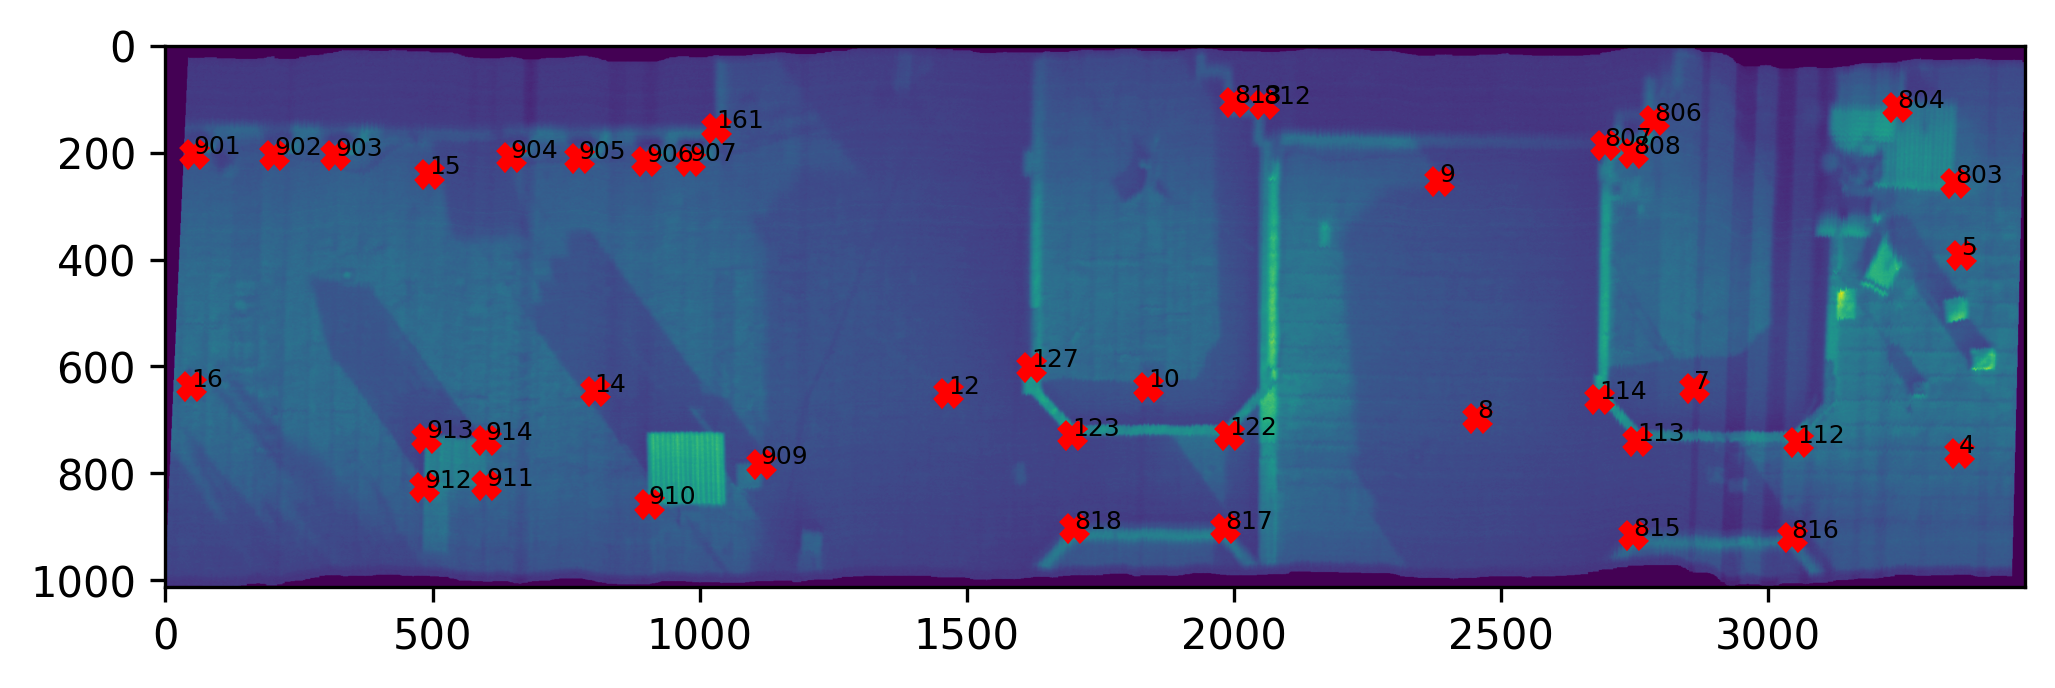

In [ ]:
image = plt.imread("image1.tif")

values = range(41)
plt.figure(figsize=(8, 6), dpi=300)

for i in values:
  plt.plot(c[i],r[i],marker='X',color='red')
  plt.text(c[i], r[i], id[i], fontdict=None,fontsize=6)

plt.imshow(image)
plt.show()

And so we realise proper choices for ICPs are points 10, 12,14, 15, 112, 114, 161, 803, 808, 812, 817, 902, 905, 909, 913.
So we've got to make lists of ground & image points of ICPs, GCPs & unknown points.

In [ ]:
xu= np.array([[x[0]],
                   [x[4]],
                   [x[5]],
                   [x[6]],
                   [x[7]],
                   [x[8]],
                   [x[10]],
                   [x[12]],
                   [x[13]],
                   [x[15]],
                   [x[18]],
                   [x[19]],
                   [x[20]],
                   [x[23]],
                   [x[24]],
                   [x[25]],
                   [x[27]],
                   [x[28]],
                   [x[30]],
                   [x[31]],
                   [x[33]],
                   [x[34]],
                   [x[36]],
                   [x[37]],
                   [x[38]],
                   [x[40]],
                   [x[41]]])

print("Image x of unkown points = " , xu)

yu = np.array([[y[0]],
              [y[4]],
                   [y[5]],
                   [y[6]],
                   [y[7]],
                   [y[8]],
                   [y[10]],
                   [y[12]],
                   [y[13]],
                   [y[15]],
                   [y[18]],
                   [y[19]],
                   [y[20]],
                   [y[23]],
                   [y[24]],
                   [y[25]],
                   [y[27]],
                   [y[28]],
                   [y[30]],
                   [y[31]],
                   [y[33]],
                   [y[34]],
                   [y[36]],
                   [y[37]],
                   [y[38]],
                   [y[40]],
                   [y[41]]])

print("Image y of unkown points  " , yu)


GCPX = np.array([[X[0]],
                   [X[4]],
                   [X[5]],
                   [X[6]],
                   [X[7]],
                   [X[8]],
                   [X[10]],
                   [X[12]],
                   [X[13]],
                   [X[15]],
                   [X[18]],
                   [X[19]],
                   [X[20]],
                   [X[23]],
                   [X[24]],
                   [X[25]],
                   [X[27]],
                   [X[28]],
                   [X[30]],
                   [X[31]],
                   [X[33]],
                   [X[34]],
                   [X[36]],
                   [X[37]],
                   [X[38]],
                   [X[40]],
                   [X[41]]])

print("GCP points' X  = " , GCPX)


GCPY = np.array(   [[Y[0]],
                   [Y[4]],
                   [Y[5]],
                   [Y[6]],
                   [Y[7]],
                   [Y[8]],
                   [Y[10]],
                   [Y[12]],
                   [Y[13]],
                   [Y[15]],
                   [Y[18]],
                   [Y[19]],
                   [Y[20]],
                   [Y[23]],
                   [Y[24]],
                   [Y[25]],
                   [Y[27]],
                   [Y[28]],
                   [Y[30]],
                   [Y[31]],
                   [Y[33]],
                   [Y[34]],
                   [Y[36]],
                   [Y[37]],
                   [Y[38]],
                   [Y[40]],
                   [Y[41]]])

print("GCP points' Y  = " , GCPY)

GCPZ = np.array([[Z[0]],
                   [Z[4]],
                   [Z[5]],
                   [Z[6]],
                   [Z[7]],
                   [Z[8]],
                   [Z[10]],
                   [Z[12]],
                   [Z[13]],
                   [Z[15]],
                   [Z[18]],
                   [Z[19]],
                   [Z[20]],
                   [Z[23]],
                   [Z[24]],
                   [Z[25]],
                   [Z[27]],
                   [Z[28]],
                   [Z[30]],
                   [Z[31]],
                   [Z[33]],
                   [Z[34]],
                   [Z[36]],
                   [Z[37]],
                   [Z[38]],
                   [Z[40]],
                   [Z[41]]])

print("GCP points' Z = " , GCPZ)

ICPx = np.array([[x[1]],
                   [x[2]],
                   [x[3]],
                   [x[9]],
                   [x[11]],
                   [x[14]],
                   [x[16]],
                   [x[17]],
                   [x[21]],
                   [x[22]],
                   [x[26]],
                   [x[29]],
                   [x[32]],
                   [x[35]],
                   [x[39]]])

print("ICP points' x " , ICPx)

ICPX = np.array([[X[1]],
                   [X[2]],
                   [X[3]],
                   [X[9]],
                   [X[11]],
                   [X[14]],
                   [X[16]],
                   [X[17]],
                   [X[21]],
                   [X[22]],
                   [X[26]],
                   [X[29]],
                   [X[32]],
                   [X[35]],
                   [X[39]]])
print("ICP points' X  " , ICPX)

ICPy = np.array([[y[1]],
                   [y[2]],
                   [y[3]],
                   [y[9]],
                   [y[11]],
                   [y[14]],
                   [y[16]],
                   [y[17]],
                   [y[21]],
                   [y[22]],
                   [y[26]],
                   [y[29]],
                   [y[32]],
                   [y[35]],
                   [y[39]]])

print("ICP points' y   " , ICPy)

ICPY = np.array([[Y[1]],
                   [Y[2]],
                   [Y[3]],
                   [Y[9]],
                   [Y[11]],
                   [Y[14]],
                   [Y[16]],
                   [Y[17]],
                   [Y[21]],
                   [Y[22]],
                   [Y[26]],
                   [Y[29]],
                   [Y[32]],
                   [Y[35]],
                   [Y[39]]])

print("ICP points' Y  " , ICPY)

ICPZ = np.array([[Z[1]],
                   [Z[2]],
                   [Z[3]],
                   [Z[9]],
                   [Z[11]],
                   [Z[14]],
                   [Z[16]],
                   [Z[17]],
                   [Z[21]],
                   [Z[22]],
                   [Z[26]],
                   [Z[29]],
                   [Z[32]],
                   [Z[35]],
                   [Z[39]]])
print("ICP points' Z " , ICPZ)


Image x of unkown points =  [[-0.18461  ]
 [ 0.04907  ]
 [ 0.05611  ]
 [ 0.0966921]
 [ 0.14683  ]
 [ 0.1463019]
 [ 0.08611  ]
 [ 0.0097549]
 [-0.0196109]
 [-0.027325 ]
 [ 0.13475  ]
 [ 0.08923  ]
 [ 0.08003  ]
 [ 0.010675 ]
 [ 0.08535  ]
 [ 0.1150157]
 [-0.0192908]
 [-0.1840833]
 [-0.1576381]
 [-0.1247516]
 [-0.09937  ]
 [-0.09125  ]
 [-0.0989465]
 [-0.1293125]
 [-0.1409148]
 [-0.1294726]
 [-0.08461  ]]
Image y of unkown points   [[-0.01234  ]
 [ 0.02606  ]
 [-0.01822  ]
 [-0.0126826]
 [ 0.0123   ]
 [-0.024725 ]
 [-0.02246  ]
 [-0.0213644]
 [-0.0214844]
 [-0.008625 ]
 [ 0.0399   ]
 [ 0.03746  ]
 [ 0.03278  ]
 [ 0.040825 ]
 [-0.04022  ]
 [-0.0406082]
 [-0.0388478]
 [ 0.031246 ]
 [ 0.030926 ]
 [ 0.0305259]
 [ 0.02982  ]
 [ 0.0299   ]
 [-0.0343269]
 [-0.0308462]
 [-0.0312063]
 [-0.0223245]
 [-0.02106  ]]
GCP points' X  =  [[102.674]
 [111.727]
 [103.537]
 [104.928]
 [110.008]
 [102.901]
 [103.061]
 [102.568]
 [102.318]
 [104.588]
 [114.593]
 [113.827]
 [112.97 ]
 [113.701]
 [ 99.834]
 [ 9

Making the Jakobian martrix.

In [ ]:
A = np.zeros((54,11))
L = np.zeros((54,1))
for i in range(1,27):
    A[2*i-1,0] = GCPX[i];
    A[2*i-1,1] = GCPY[i];
    A[2*i-1,2] = GCPZ[i];
    A[2*i-1,3] = 1;
    A[2*i-1,4] = 0;
    A[2*i-1,5] = 0;
    A[2*i-1,6] = 0;
    A[2*i-1,7] = 0;
    A[2*i-1,8] = -GCPX[i]*xu[i];
    A[2*i-1,9] =-GCPY[i]*xu[i];
    A[2*i-1,10] =-GCPZ[i]*xu[i];
    L[2*i-1,0] = xu[i];
    A[2*i,0] = 0;
    A[2*i,1] = 0;
    A[2*i,2] = 0;
    A[2*i,3] = 0;
    A[2*i,4] = GCPX[i];
    A[2*i,5] = GCPY[i];
    A[2*i,6] = GCPZ[i];
    A[2*i,7] = 1;
    A[2*i,8] = -GCPX[i]*yu[i];
    A[2*i,9] = -GCPY[i]*yu[i];
    A[2*i,10] =-GCPZ[i]*yu[i];
    L[2*i,0] = yu[i];

print("A = " , A)
print("L = " , L)

A =  [[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [111.727      220.913       99.823        1.           0.
    0.           0.           0.          -5.48244389 -10.84020091
   -4.89831461]
 [  0.           0.           0.           0.         111.727
  220.913       99.823        1.          -2.91160562  -5.75699278
   -2.60138738]
 [103.537      219.201       99.93         1.           0.
    0.           0.           0.          -5.80946107 -12.29936811
   -5.6070723 ]
 [  0.           0.           0.           0.         103.537
  219.201       99.93         1.           1.88644414   3.99384222
    1.8207246 ]
 [104.928      211.461      101.88         1.           0.
    0.           0.           0.         -10.14570867 -20.44660816
   -9.85099115]
 [  0.           0.           0.           0.         104.928
  211.461      101.88         1.           1.33075985   2.68187528
    1.29210329]


Using the least squares method to evaluate unkowns.

In [ ]:
xcap = np.linalg.inv(A.T @ A) @ A.T @ L
print("xcap = " , xcap)

xcap =  [[ 5.81828316e-05]
 [-2.08860686e-03]
 [-3.43237216e-04]
 [ 5.09322925e-01]
 [ 2.16181282e-03]
 [ 8.95420635e-05]
 [ 9.88330976e-05]
 [-2.60763788e-01]
 [-3.83415337e-04]
 [-2.71616694e-04]
 [-4.91581243e-03]]


Calculating ICPs' coordinates through evaluated parameters.

In [ ]:
calc_ICPx = np.zeros((15,1))
calc_ICPy = np.zeros((15,1))
for i in range(1 , 15):
    calc_ICPx[i,0] = ( xcap[0]*ICPX[i] + xcap[1] *ICPY[i] + xcap[2] *ICPZ[i] +xcap[3] ) / ( xcap[8]*ICPX[i] + xcap[9]*ICPY[i] + xcap[10]*ICPZ[i] + 1 );
    calc_ICPy[i,0] = ( xcap[4]*ICPX[i] + xcap[5] *ICPY[i] + xcap[6] *ICPZ[i]   +xcap[7] ) / ( xcap[8]*ICPX[i] + xcap[9]*ICPY[i] + xcap[10]*ICPZ[i] + 1 );

print("x_ICP = " , calc_ICPx)
print("y_ICP = " , calc_ICPy)

x_ICP =  [[ 0.        ]
 [-0.04042041]
 [-0.00585878]
 [ 0.11698652]
 [ 0.07892429]
 [-0.08471569]
 [-0.10591135]
 [ 0.14554448]
 [ 0.08514512]
 [ 0.01517326]
 [ 0.00892954]
 [-0.16938924]
 [-0.1114236 ]
 [-0.0777048 ]
 [-0.13961119]]
y_ICP =  [[ 0.        ]
 [-0.01453242]
 [-0.01267353]
 [-0.0222294 ]
 [-0.01417009]
 [ 0.03530508]
 [-0.01416773]
 [ 0.02534181]
 [ 0.03207962]
 [ 0.03945708]
 [-0.03885533]
 [ 0.03194342]
 [ 0.03092331]
 [-0.02723343]
 [-0.0220217 ]]


Evaluating residual vectors' component.

In [ ]:
Dx = np.zeros((15,1))
Dy = np.zeros((15,1))

for i in range(1,15):
    Dx[i,0] = ICPx[i] - calc_ICPx[i];
    Dy[i,0] = ICPy[i] - calc_ICPy[i];

print("Dx = " , Dx)
print("Dy = " , Dy)

Dx =  [[ 0.00000000e+00]
 [-2.50959326e-03]
 [ 4.88782870e-04]
 [-8.36516698e-04]
 [ 4.43105900e-05]
 [-1.65430707e-03]
 [-3.15715203e-03]
 [ 1.25519329e-04]
 [ 2.04881086e-04]
 [ 1.00173688e-03]
 [ 6.52573266e-05]
 [ 3.88841664e-04]
 [-6.26400303e-04]
 [-2.65199070e-04]
 [-9.43512176e-04]]
Dy =  [[ 0.00000000e+00]
 [ 9.52421123e-04]
 [ 2.53532217e-04]
 [-5.10599460e-04]
 [-4.32906648e-04]
 [ 7.94922002e-04]
 [ 9.24930972e-04]
 [ 4.78190466e-04]
 [-7.79618337e-04]
 [ 1.11792325e-03]
 [-7.24710586e-05]
 [-9.37424456e-04]
 [-5.03307355e-04]
 [ 4.13430416e-04]
 [ 9.71954231e-05]]


Calculating residual vectors and their angeles.

In [ ]:
teta = np.zeros((15,1))
dr = np.zeros((15,1))
for i in range(1 , 15):
    teta[i,0] = m.atan(Dy[i]/Dx[i]);
    dr[i,0] = m.sqrt( (Dx[i])**2 + (Dy[i])**2 );

print("teta = " , teta)
print("dr = " , dr)

teta =  [[ 0.        ]
 [-0.36272064]
 [ 0.47849632]
 [ 0.54802249]
 [-1.46879556]
 [-0.44793975]
 [-0.28498905]
 [ 1.31409909]
 [-1.31381049]
 [ 0.84015705]
 [-0.83772686]
 [-1.17759861]
 [ 0.67686632]
 [-1.00044808]
 [-0.10265239]]
dr =  [[0.00000000e+00]
 [2.68424372e-03]
 [5.50624444e-04]
 [9.80036731e-04]
 [4.35168467e-04]
 [1.83538358e-03]
 [3.28984897e-03]
 [4.94389749e-04]
 [8.06089952e-04]
 [1.50107600e-03]
 [9.75221668e-05]
 [1.01487066e-03]
 [8.03551886e-04]
 [4.91177418e-04]
 [9.48505233e-04]]


Calculating RMSE and forming diagrams.

In [ ]:
RMSE = 0
for i in range(1 , 15):
    RMSE = RMSE + m.sqrt( (dr[i]**2) / (15-1) );

print("RMSE = " , RMSE)

RMSE =  0.004258136790934606


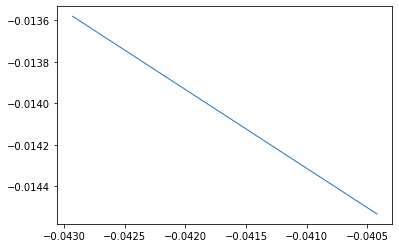

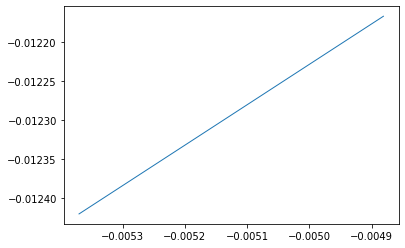

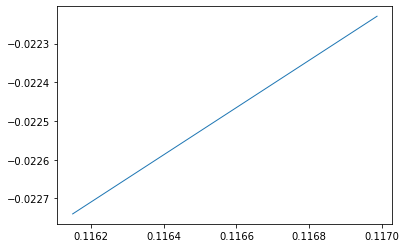

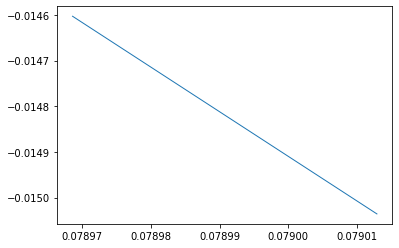

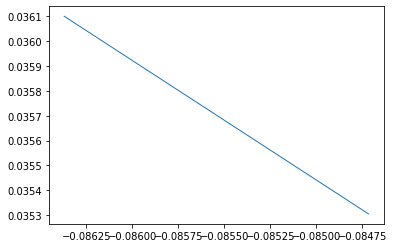

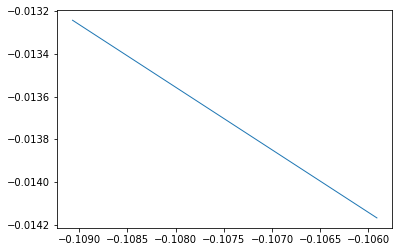

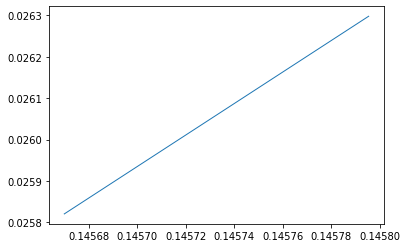

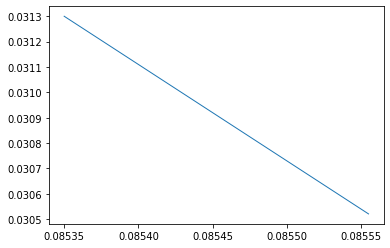

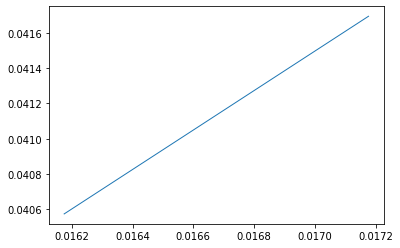

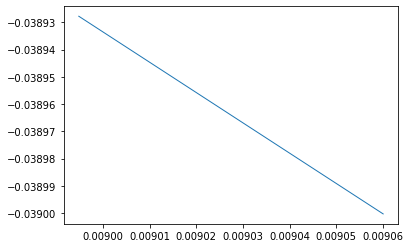

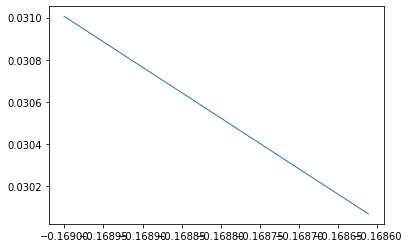

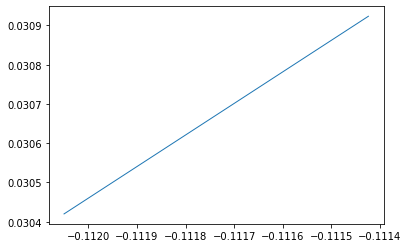

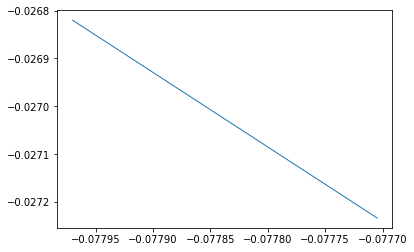

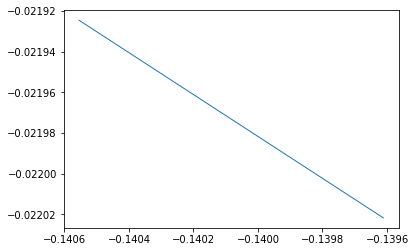

In [ ]:
xx=np.zeros((15,1))
yy=np.zeros((15,1))

for i in range(1,15):
    xx[i]= ICPx[i]+(dr[i]*m.cos(teta[i]));
    yy[i]= ICPy[i]+(dr[i]*m.sin(teta[i]));
    plt.plot([ICPx[i] , xx[i]] , [ICPy[i] , yy[i]] , MarkerSize = 2 , LineWidth = 1 )
    plt.show()